<h2><center>Train Models with Label Encoder</center></h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

In [2]:
# Load the cleaned data
df = pd.read_csv('../Data/adult_cleaned.csv')

### Label Encoding

Label Encoding is a technique used in machine learning to handle categorical data, which are variables that contain a finite set of unique values or categories. In Label Encoding, each category is assigned a unique numerical value.

The process involves mapping each category to a numerical label, typically starting from 0 and incrementing for each unique category.

In [3]:
# label encoding

le = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    # print the class name and the label for each column as a dataframe
    print(pd.DataFrame({col: le.classes_, 'label': le.transform(le.classes_)}))
    print()

          workclass  label
0       Federal-gov      0
1         Local-gov      1
2           Private      2
3      Self-emp-inc      3
4  Self-emp-not-inc      4
5         State-gov      5
6       Without-pay      6

       education  label
0           10th      0
1           11th      1
2           12th      2
3        1st-4th      3
4        5th-6th      4
5        7th-8th      5
6            9th      6
7     Assoc-acdm      7
8      Assoc-voc      8
9      Bachelors      9
10     Doctorate     10
11       HS-grad     11
12       Masters     12
13     Preschool     13
14   Prof-school     14
15  Some-college     15

          marital-status  label
0               Divorced      0
1      Married-AF-spouse      1
2     Married-civ-spouse      2
3  Married-spouse-absent      3
4          Never-married      4
5              Separated      5
6                Widowed      6

           occupation  label
0        Adm-clerical      0
1        Armed-Forces      1
2        Craft-repair      2
3

In [4]:
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [5]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,2,9,5,2,0,0,0,40,4,0


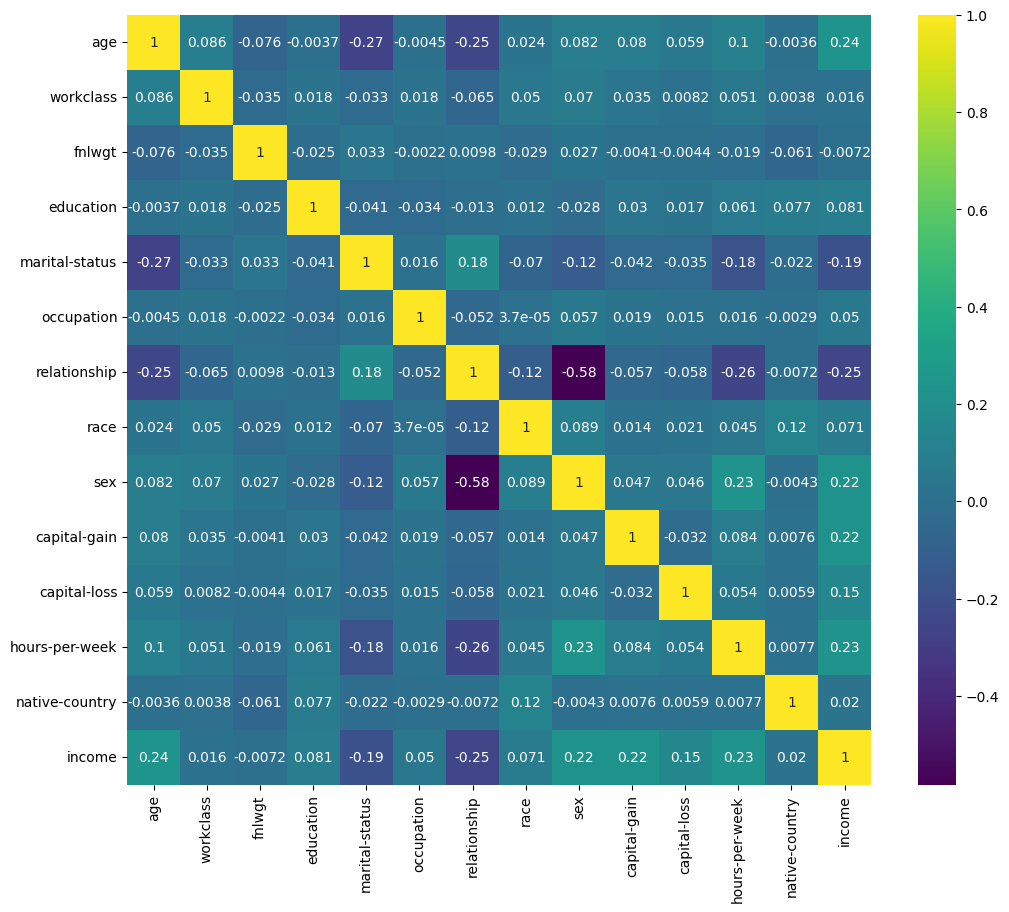

In [6]:
# Check the correlation between the features

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [7]:
# Split to X and y
X = df.drop(columns=['income'])
y = df['income']

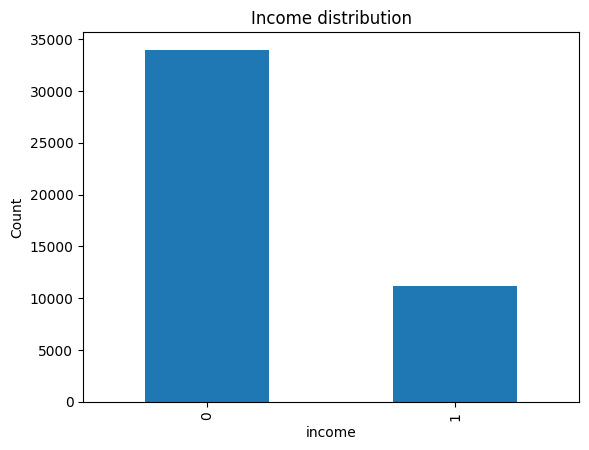

In [8]:
y.value_counts().plot(kind='bar')
plt.title('Income distribution')
plt.ylabel('Count')
plt.show()

As we can see the dataset is imbalanced. It will cause to the model performance. Therefore the dataset will be balanced with oversampling technique.

### SMOTE (Synthetic Minority Over-sampling Technique)

This technique works by generating synthetic samples in the minority class by interpolating between existing minority class instances.

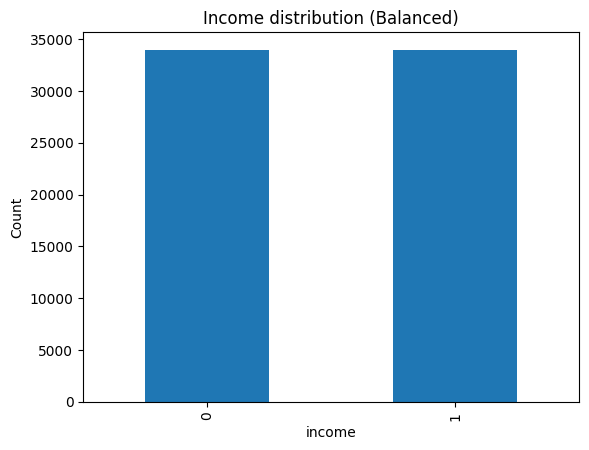

In [9]:
# Over sampling
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts().plot(kind='bar')
plt.title('Income distribution (Balanced)')
plt.ylabel('Count')
plt.show()

In [10]:
# Split to train and test

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape

((54356, 13), (13590, 13))

In [12]:
y_train.value_counts()

income
0    27227
1    27129
Name: count, dtype: int64

### Train the Random Forest Model

In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Predict train set
y_pred_train = model.predict(X_train)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train)}")

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6746
           1       0.88      0.89      0.89      6844

    accuracy                           0.89     13590
   macro avg       0.89      0.89      0.89     13590
weighted avg       0.89      0.89      0.89     13590

Testing Accuracy: 0.8869757174392936
Training Accuracy: 0.9999264110677754


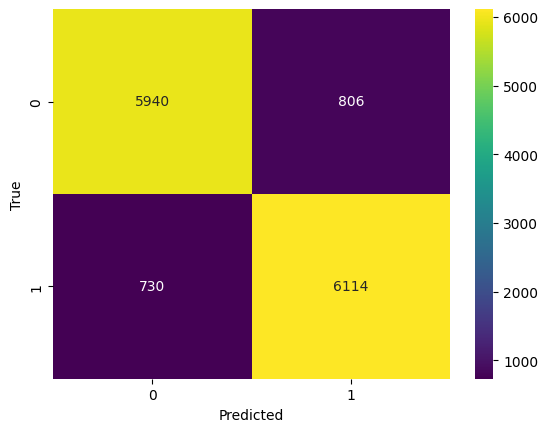

In [14]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Receiver Operating Characteristic (ROC) Curve:

The ROC curve is a graphical representation used in binary classification tasks to evaluate the performance of a classifier. It illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) at various threshold values.

$\text{True Positive Rate} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$

$\text{False Positive Rate} = \frac{\text{False Positive}}{\text{False Positive} + \text{True Negative}}$

The ROC curve is particularly useful for comparing the performance of different classifiers or for selecting the appropriate threshold for making predictions based on the specific requirements of the task.

### Area Under Curve (AUC) Score

This is a single scalar value that summarizes the performance of a classifier based on its ROC curve. It represents the area under the ROC curve, which ranges from 0 to 1.

| AUC Range | Classification Accuracy |
|-----------|-------------------------|
| 0.9 - 1   | Excellent               |
| 0.8 - 0.9 | Good                    |
| 0.7 - 0.8 | Fair                    |
| 0.6 - 0.7 | Bad                     |
| 0.5 - 0.6 | Very Bad                |

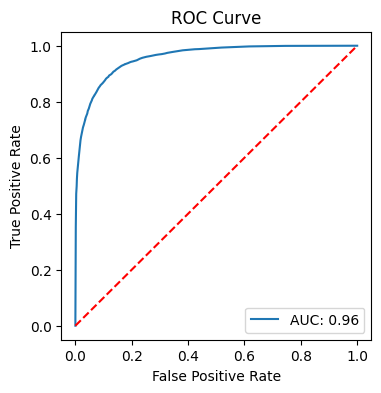

In [15]:
# get the probability of the positive class (>50k)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# get the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot the roc curve
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Train Naive Bayes Model

In [16]:
model = GaussianNB()
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Predict train set
y_pred_train = model.predict(X_train)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train)}")

              precision    recall  f1-score   support

           0       0.57      0.94      0.71      6746
           1       0.84      0.31      0.45      6844

    accuracy                           0.62     13590
   macro avg       0.71      0.62      0.58     13590
weighted avg       0.71      0.62      0.58     13590

Testing Accuracy: 0.6211920529801325
Training Accuracy: 0.6276400029435573


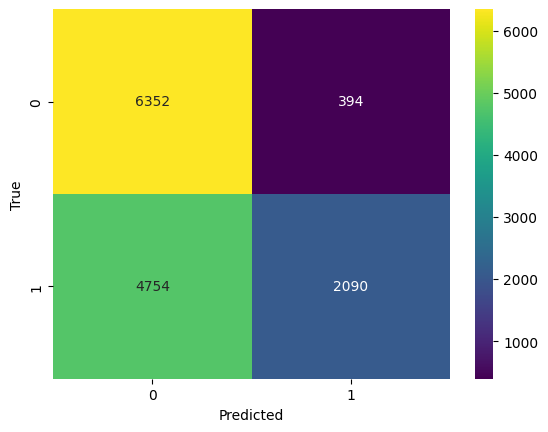

In [17]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

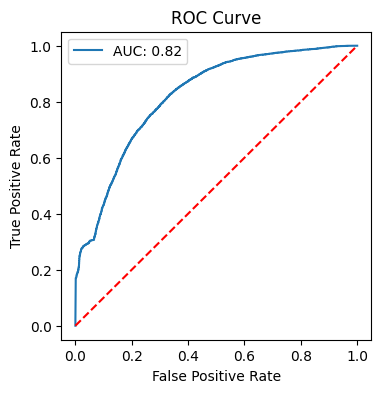

In [18]:
# get the probability of each class
y_pred_proba = model.predict_proba(X_test)

# get the probability of the positive class (>50k)
y_pred_proba = y_pred_proba[:, 1]

# get the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot the roc curve
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Overall Conclusion :

The 2 models (Raandom Forest Classifier and Gaussian Naive Bayes) trained with Label Encoded the categorical variables and the dataset balanced with Oversampling technique. (SMOTE). 

#### The summary of the results shown as below.

| Metrics | Random Forest Classifier | Gaussian Naive Bayes |
| - | ------------------------ | ----------------------|
| Testing Accuracy | 88.67% | 62.12% |
| Classification Report | 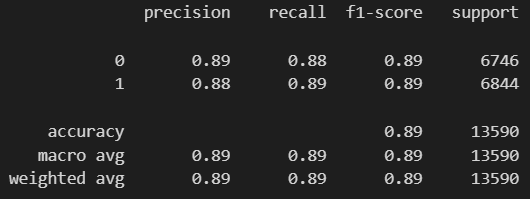 | 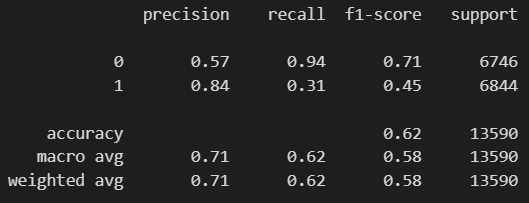 |
| Confusion Matrix | 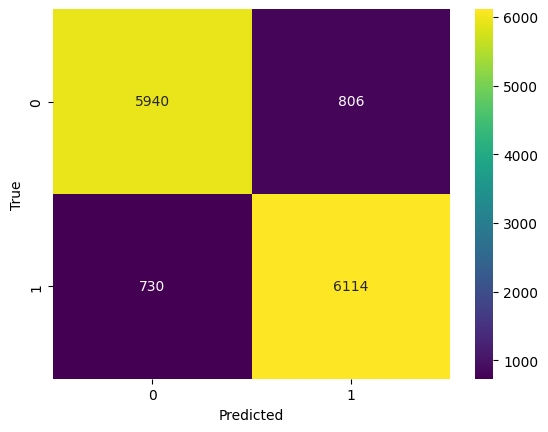 | 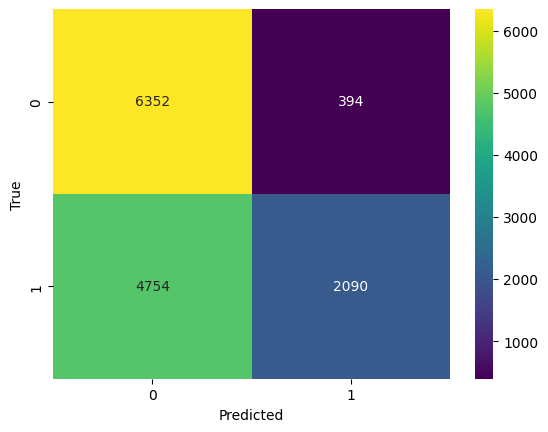 |
| ROC - Curve | 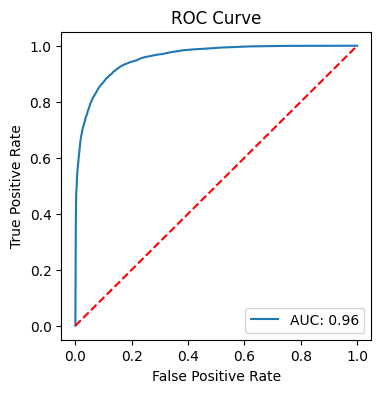 | 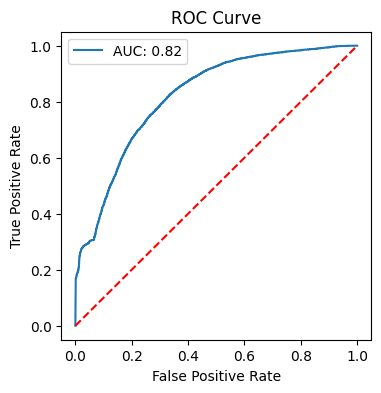 |
| ROC - AUC Score | 0.96 | 0.82 |

By oversampling the dataset, the Random Forest Model Accuracy incresed from 85.57% to 88.67%. But the performance of the Naive Bayes model was decreased.